Halo semua, perkenalkan, saya Elli, dan saya sedang belajar Data Science. Kali ini, saya diminta untuk membuat porto. Sempat bingung mau buat Porto seperti apa karena saya sendiri masih sekitar 2 bulan belajar di Dibimbing.

------------------------

Di kantor tempat saya bekerja, kami baru mendapatkan software demo untuk bisa melakukan splitting produksi dengan cepat. Tapi syaratnya, format data yang dikirimkan harus sesuai dengan format software tersebut. Untuk bisa membuat tabel seperti yang diinginkan software, dibutuhkan waktu yang sangat lama karena perlu menggabungkan dan memasangkan tabel yang satu dengan tabel yang lain. Kalau dikerjakan dengan manual, maka akan membutuhkan waktu yang lama. Tapi, semuanya bisa dikejakan dalam waktu 30 menit lewat ilmu data science.

-----------------------------------------------------------------------------

Sekarang, saya ingin membagikan tips seputar cara menggabungkan tabel dan melakukan merging!


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Belajar Data Science Dibimbing

/content/gdrive/MyDrive/Belajar Data Science Dibimbing


Pertama-tama, saya load dulu semua data yang digunakan. Berikut ini adalah keterangan dari setiap data#
- Well: Sumur
- Surface: Zona reservoir
- PHIE: Porositas efektif. Kemampuan batuan untuk menyimpan fluida.
- Perm: Permeabilitas. Kemampuan batuan untuk mengalirkan fluida.
- NTG: Net to Gross. Presentasi dari reservoir

In [ ]:
df = pd.read_csv('Porto tarbert.csv')
df_prop = pd.read_csv('Porto tarbert2.csv')
df = df.rename(columns={'Well identifier':'Well'})
df_prop = df_prop.rename(columns={'Zone log': 'Surface',
                                  'Porosity': 'PHIE',
                                  'Continuous': 'NTG'})
df_prop.head(7)

,Well,Surface,PHIE,Perm,NTG
0,A10,Zone Top_Tarbert,0.2468,105.2969,0.68
1,A10,Zone 1,0.2454,75.9825,0.22
2,A10,Zone Tarbert2,0.0870,94.0645,0.23
3,A10,Zone 2,0.2399,67.7691,0.00
4,A10,Zone Tarbert1,0.0870,69.8877,0.00
5,A10,Zone 3,0.2540,159.4569,0.00
6,A10,Zone Top_Ness,0.2670,133.8301,0.74


- MD: Data kedalaman dari setiap zona reservoir / Surface
- Prod: Status produksi pada sumur dan zona terkait. Oil berarti sumurnya memproduksikan minyak (hooreee!), sementara Dry berarti sumurnya tidak ada minyak

In [ ]:
df.head()

,Well,Surface,MD,Prod
0,A10,Top_Tarbert,1754.67,Oil
1,A10,Bot_Tarbert,1807.02,Oil
2,A10,Tarbert2,1829.32,Dry
3,A10,Bot_Tarbert2,1842.11,NaN
4,A10,Tarbert1,1843.91,Dry


Dalam setiap zona reservoir, pasti ada Top dan Bottom. Top menandakan bagian atas zona sementara Bottom adalah bagian bawah zona. Sebenarnya, pekerjaan di kantor saya termasuk mudah, yakni, memindahkan MD yang ada di setiap bot ke kolom yang baru. Tapi masalahnya, data yang saya pegang sampai ribuan dan jika kita menggunakan filter excel biasa, maka akan sangat menguras waktu. Dan saya akan mencoba mengerjakannya dengan ilmu manipulasi data dan tabel berkat belajar dari Dibimbing.

Langkah saya yang pertama adalah membuat data Frame baru. Di sini, karena semua format Bottom sama, maka saya tinggal membuat dataframe baru yang hanya ada di Bot dengan kode seperti ini:

In [ ]:
bot  = df[df['Surface'].str.contains("Bot")]
bot.head(7)

,Well,Surface,MD,Prod
1,A10,Bot_Tarbert,1807.02,Oil
3,A10,Bot_Tarbert2,1842.11,NaN
5,A10,Bot_Tarbert1,1852.70,NaN
7,A10,Bot_Ness,1878.07,NaN
9,A10,Bot_Etive,1961.83,NaN
11,A15,Bot_Tarbert,1883.33,NaN
13,A15,Bot_Tarbert2,1902.95,NaN


Untuk kolom Produksi sebenarnya tidak diperlukan karena nilanya hampir semua NaN. Jadi bisa kita drop dengan menggunakan kode:

In [ ]:
bot.drop('Prod', axis = 1, inplace = True)
bot.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Well,Surface,MD
1,A10,Bot_Tarbert,1807.02
3,A10,Bot_Tarbert2,1842.11
5,A10,Bot_Tarbert1,1852.70
7,A10,Bot_Ness,1878.07
9,A10,Bot_Etive,1961.83


Langkah berikutnya adalah saya ingin mengganti nama kolom agar ketika digabung, tidak menjadi double (MD_x dan MD_y). Selain itu, saya ingin membuat agar nama surface yang ada di Top sama seperti dengan di Bottom. Jadi, saya menghapus semua tulisan Bot_ pada setiap row. Untuk melakukannya, saya menggunakan:

In [ ]:
bot['Surface'] = bot['Surface'].str[4:] ## Di sini saya menghapus 4 string pertama (karena semua format penulisannya sama) di kolom surface untuk menghapus Bot_.
bot = bot.rename(columns={'MD': 'MD_Bot'})
bot.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Well,Surface,MD_Bot
1,A10,Tarbert,1807.02
3,A10,Tarbert2,1842.11
5,A10,Tarbert1,1852.70
7,A10,Ness,1878.07
9,A10,Etive,1961.83


Untuk semua Bot di kolom dataframe awal akan saya hapus karena sudah dibuatkan df yang baru. Selain itu, saya juga menghapus string Top_ pada Surface agar bisa sama seperti dataframe bot. Tujuannya adalah agar bisa dilakukan merging antara top dan bottom.

In [ ]:
df = df[~df.Surface.str.contains('|'.join(['Bot|bot']))]
df = df.replace('Top_', '', regex=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Well,Surface,MD,Prod
0,A10,Tarbert,1754.67,Oil
1,A10,Tarbert2,1829.32,Dry
2,A10,Tarbert1,1843.91,Dry
3,A10,Ness,1856.40,Oil
4,A10,Etive,1926.08,Dry


Setelah semuanya sudah oke, maka tinggal melakukan merging antara dataframe utama dan dataframe bot. Di sini, saya menggunakan Well dan Surface sebagai index karena jika tidak, maka secara default Python akan menggabungkan semua data yang sama sehingga hasilnya akan salah. Jadi karena alasan ini well dan surface harus disamakan namanya.

In [ ]:
df1 = pd.merge(df, bot, how = "left", on=["Well", "Surface"])
df1.head()

,Well,Surface,MD,Prod,MD_Bot
0,A10,Tarbert,1754.67,Oil,1807.02
1,A10,Tarbert2,1829.32,Dry,1842.11
2,A10,Tarbert1,1843.91,Dry,1852.70
3,A10,Ness,1856.40,Oil,1878.07
4,A10,Etive,1926.08,Dry,1961.83


Ketika kita berbicara reservoir migas, maka sering kali ditanya oleh advisor "Ketebalannya berapa?". Untuk bisa menjawab pertanyaan ini, sangat mudah, yakni tinggal Top dikurangi Bottom.

In [ ]:
df1['Thickness'] = df1['MD_Bot'] - df1['MD']
df1 = df1[df1['Thickness'].notna()]
df1.head(6)

,Well,Surface,MD,Prod,MD_Bot,Thickness
0,A10,Tarbert,1754.67,Oil,1807.02,52.35
1,A10,Tarbert2,1829.32,Dry,1842.11,12.79
2,A10,Tarbert1,1843.91,Dry,1852.70,8.79
3,A10,Ness,1856.40,Oil,1878.07,21.67
4,A10,Etive,1926.08,Dry,1961.83,35.75
5,A15,Tarbert,1879.35,Oil,1883.33,3.98


Biasanya, ketika melakukan pemodelan geologi, sering ada kesalahan ketika kita membuat top dan bottom sampai 2 kali. Contohnya adalah seperti di bawah. Pada well B9 ditemukan Zona Ness sebanyak 2 kali. 

In [ ]:
duplicateRowsDF = df1[df1.duplicated(['Well', 'Surface'])]
duplicateRowsDF.head(10)


,Well,Surface,MD,Prod,MD_Bot,Thickness
34,B9,Ness,1963.26,Oil,1971.26,8.0


Yang mana yang harus dihapus kalau kita ketemu duplikat ini? Sebenarnya jawaban yang paling tepat adalah kita harus memeriksa kembali di software pemodelan geologi. Tapi di sini, untuk menghemat waktu, saya ingin menghapus Row dengan Thickness yang kecil (Thickness paling tinggi akan saya keep di data). Untuk melakukan hal ini, saya menggunakan:

In [ ]:
c_maxes = df1.groupby(['Well', 'Surface']).Thickness.transform(max)
df1 = df1.loc[df1.Thickness == c_maxes]
df1.head()

,Well,Surface,MD,Prod,MD_Bot,Thickness
0,A10,Tarbert,1754.67,Oil,1807.02,52.35
1,A10,Tarbert2,1829.32,Dry,1842.11,12.79
2,A10,Tarbert1,1843.91,Dry,1852.70,8.79
3,A10,Ness,1856.40,Oil,1878.07,21.67
4,A10,Etive,1926.08,Dry,1961.83,35.75


In [ ]:
df1.reset_index(drop=True, inplace=True)
df1.head()

,Well,Surface,MD,Prod,MD_Bot,Thickness
0,A10,Tarbert,1754.67,Oil,1807.02,52.35
1,A10,Tarbert2,1829.32,Dry,1842.11,12.79
2,A10,Tarbert1,1843.91,Dry,1852.70,8.79
3,A10,Ness,1856.40,Oil,1878.07,21.67
4,A10,Etive,1926.08,Dry,1961.83,35.75


Berikutnya, jangan lupa kalau kita masih punya 1 data frame lagi yang harus di merge (data frame yang berisi properti batuan. Sama seperti langkah sebelumnya, saya ingin menyamakan nama di Well dan Surface agar bisa dilakukan merging dengan sempurna.

In [ ]:
df_prop = df_prop.rename(columns={'Zone log': 'Surface',
                                  'Porosity': 'PHIE',
                                  'Continuous': 'NTG'})
df_prop['Surface'] = (df_prop.Surface.str.replace('Zone ', ''))
df_prop['Surface'] = (df_prop.Surface.str.replace('Top_', ''))
df_prop.head()

,Well,Surface,PHIE,Perm,NTG
0,A10,Tarbert,0.2468,105.2969,0.68
1,A10,1,0.2454,75.9825,0.22
2,A10,Tarbert2,0.0870,94.0645,0.23
3,A10,2,0.2399,67.7691,0.00
4,A10,Tarbert1,0.0870,69.8877,0.00


Merging dilakukan sama seperti sebelumnya

In [ ]:
df2 = pd.merge(df1, df_prop, how = "left", on=["Well", "Surface"])
df2.head(20)

,Well,Surface,MD,Prod,MD_Bot,Thickness,PHIE,Perm,NTG
0,A10,Tarbert,1754.67,Oil,1807.02,52.35,0.2468,105.2969,0.68
1,A10,Tarbert2,1829.32,Dry,1842.11,12.79,0.0870,94.0645,0.23
2,A10,Tarbert1,1843.91,Dry,1852.70,8.79,0.0870,69.8877,0.00
3,A10,Ness,1856.40,Oil,1878.07,21.67,0.2670,133.8301,0.74
4,A10,Etive,1926.08,Dry,1961.83,35.75,NaN,NaN,NaN
5,A15,Tarbert,1879.35,Oil,1883.33,3.98,0.2198,375.4153,0.83
6,A15,Tarbert2,1885.48,Dry,1902.95,17.47,0.0670,85.8504,0.24
7,A15,Tarbert1,1905.73,Dry,1920.09,14.36,0.0560,37.0056,0.67
8,A15,Ness,1922.59,Oil,1992.22,69.63,0.1905,158.4891,0.74
9,A15,Etive,2074.52,Dry,2082.78,8.26,NaN,NaN,NaN


Di atas terlihat kalau ada zona yang tidak memiliki properti (Zona Etive). Bisa jadi zona ini masih belum masuk dalam rencana pengembangan sehingga bisa kita hapus terlebih dahulu. Selain itu, di sini kita bisa melakukan perhitungan net reservoir atau net sand. Jadi, Thickness itu masih ketebalan kotor dan bisa saja didalamnya bukan minyak atau zona yang menarik. 

In [ ]:
df2.dropna(subset = ['PHIE', 'Perm', 'NTG'], inplace=True)
df2.reset_index(drop=True, inplace=True)
df2['Net_Sand'] = df2['Thickness'] * df2['NTG']
df2.head()

,Well,Surface,MD,Prod,MD_Bot,Thickness,PHIE,Perm,NTG,Net_Sand
0,A10,Tarbert,1754.67,Oil,1807.02,52.35,0.2468,105.2969,0.68,35.5980
1,A10,Tarbert2,1829.32,Dry,1842.11,12.79,0.0870,94.0645,0.23,2.9417
2,A10,Tarbert1,1843.91,Dry,1852.70,8.79,0.0870,69.8877,0.00,0.0000
3,A10,Ness,1856.40,Oil,1878.07,21.67,0.2670,133.8301,0.74,16.0358
4,A15,Tarbert,1879.35,Oil,1883.33,3.98,0.2198,375.4153,0.83,3.3034


Sebenarnya sampai di sini tugas saya sudah selesai. Tapi, karena data Science harus bisa *story telling,* maka saya akan menambahkan sedikit cerita seputar pekerjaan saya di kantor.

Saat melakukan pemodelan geologi, biasanya grid yang dihasilkan bisa sampai jutaan dan hal ini akan sangat memakan waktu ketika tim reservoir melakukan simulasi. Jadi biasanya, kita menggunakan nilai cutoff. Nilai ini menjadi ambang batas apakah properti tersebut menarik atau tidak pada angka tertentu. Untuk mencarinya, terlihat dari tabel kalau PHIE di bawah 0.1, maka sumurnya tidak ada yang menghasilkan minyak. Jadi di sini, saya memasang cut off di 0.1 agar ketika ada grid yang memiliki nilai di bawah 0.1, maka tidak akan diproses perhitungannya.

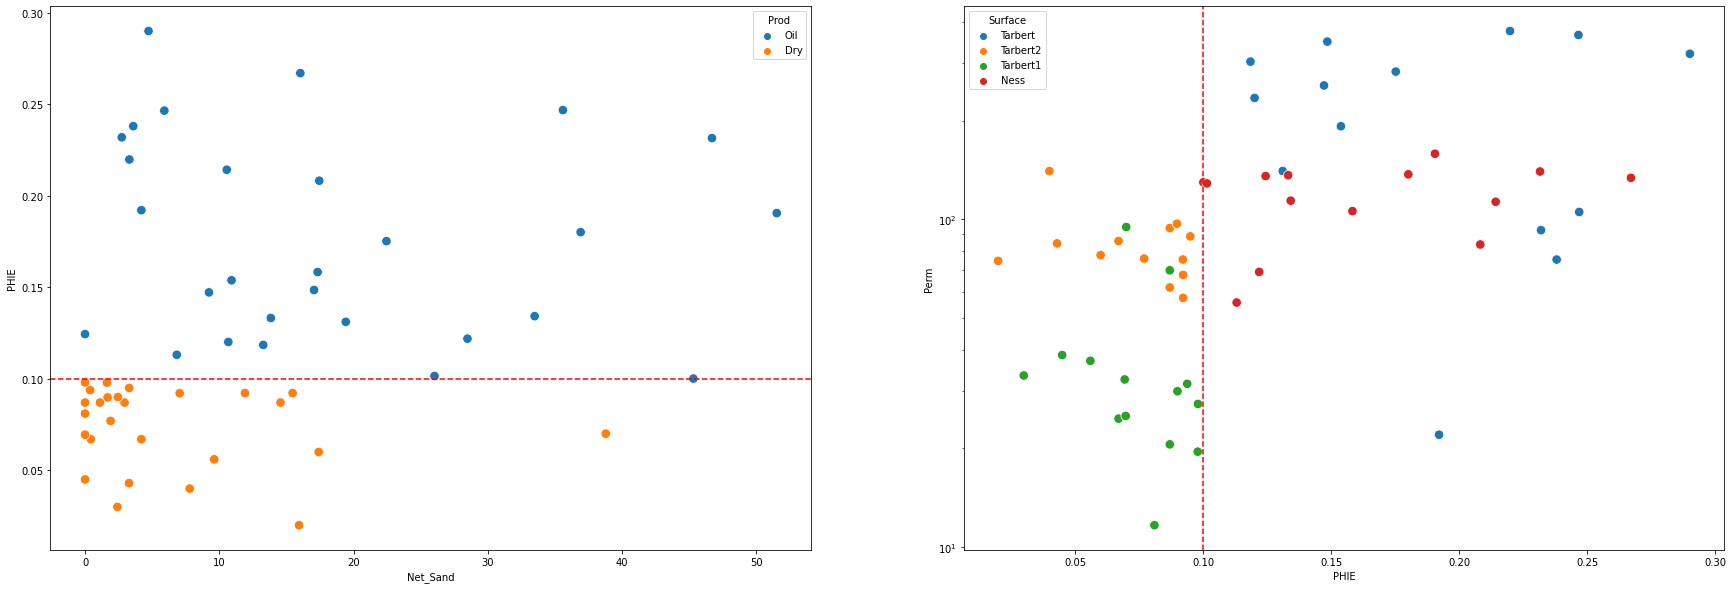

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(30,10))

##Plot 1
phie_vs_nets = sns.scatterplot(data=df2, x='Net_Sand', y='PHIE', hue = 'Prod', ax = ax[0], s = 90)
phie_vs_nets.axhline(y=0.1, color='r', linestyle='--')
##Plot 2
phie_vs_perm = sns.scatterplot(data=df2, x='PHIE', y='Perm', hue = 'Surface', ax = ax[1], s = 90)
phie_vs_perm.set(yscale="log")
phie_vs_perm.axvline(x=0.1, color='r', linestyle='--')

Terlihat juga di gambar kanan bahwa zona Tarbert 2 dan Tarbert 1 tidak menarik untuk dikembangkan. Karena alasan ini, kita bisa fokus ke Tarbert untuk dilakukan pengembangan karena nilai Permeabilitas dan Porositas yang tinggi.

Saat melakukan pemodelan geologi, biasanya grid yang dihasilkan bisa sampai jutaan dan hal ini akan sangat memakan waktu ketika tim reservoir melakukan simulasi. Jadi biasanya, kita menggunakan nilai cutoff.